In [0]:
!pip install -U tensorflow==2.0

In [0]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import json
import pandas as pd
from pandas.io.json import json_normalize
from pprint import pprint

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
project_path = "/content/drive/My Drive/AIML-MRC-Capstone/datasets/Squad2.0/TrainingDataset/"
#datafile = project_path+'train-v2.0.json'

In [0]:
datafile = project_path+'squad_data_final.csv'

In [0]:
#squad_df = pd.read_csv(project_path+'squad_train_data.csv')
squad_df = pd.read_csv(datafile)
squad_df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
squad_df.head()

,title,context,question,id,answer_start,answer,plausible_answer_start,plausible_answer,is_impossible,clean_context,clean_question,clean_answer
0,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,56be85543aeaaa14008c9063,269.0,in the late 1990s,NaN,NaN,False,beyonc giselle knowlescarter bijnse beeyonsay ...,when did beyonce start becoming popular,in the late 1990s
1,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,56be85543aeaaa14008c9065,207.0,singing and dancing,NaN,NaN,False,beyonc giselle knowlescarter bijnse beeyonsay ...,what areas did beyonce compete in when she was...,singing and dancing
2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,56be85543aeaaa14008c9066,526.0,2003,NaN,NaN,False,beyonc giselle knowlescarter bijnse beeyonsay ...,when did beyonce leave destinys child and beco...,2003
3,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,56bf6b0f3aeaaa14008c9601,166.0,"Houston, Texas",NaN,NaN,False,beyonc giselle knowlescarter bijnse beeyonsay ...,in what city and state did beyonce grow up,houston texas
4,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,56bf6b0f3aeaaa14008c9602,276.0,late 1990s,NaN,NaN,False,beyonc giselle knowlescarter bijnse beeyonsay ...,in which decade did beyonce become famous,late 1990s


In [12]:
squad_df.describe()

,answer_start,plausible_answer_start
count,86808.000000,43498.000000
mean,319.815144,315.999563
std,266.396358,266.898767
min,0.000000,0.000000
25%,111.000000,101.000000
50%,262.000000,261.000000
75%,468.000000,470.000000
max,3126.000000,3292.000000


In [13]:
squad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130306 entries, 0 to 130305
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   title                   130306 non-null  object 
 1   context                 130306 non-null  object 
 2   question                130306 non-null  object 
 3   id                      130306 non-null  object 
 4   answer_start            86808 non-null   float64
 5   answer                  86807 non-null   object 
 6   plausible_answer_start  43498 non-null   float64
 7   plausible_answer        43498 non-null   object 
 8   is_impossible           130306 non-null  bool   
 9   clean_context           130306 non-null  object 
 10  clean_question          130306 non-null  object 
 11  clean_answer            130306 non-null  object 
dtypes: bool(1), float64(2), object(9)
memory usage: 11.1+ MB


In [14]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


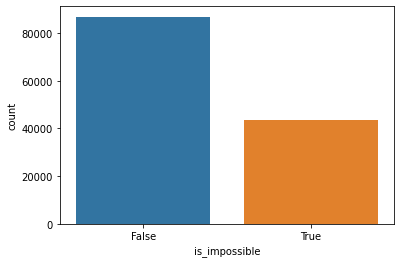

In [15]:
sns.countplot(data = squad_df, x = "is_impossible")

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

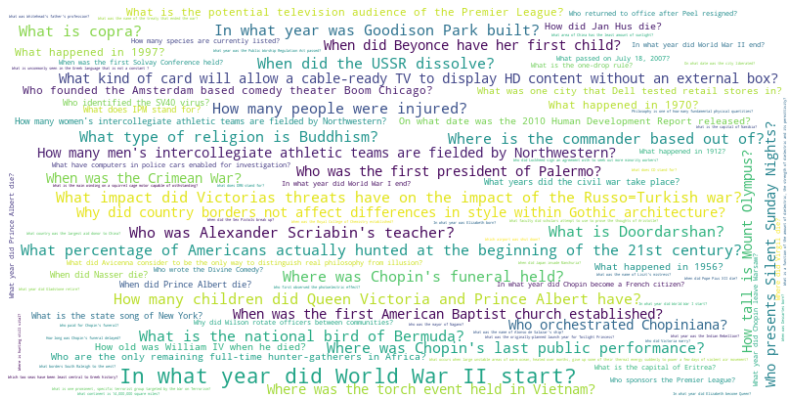

In [17]:
text1 = dict(squad_df.question.value_counts())
wordcloud = WordCloud(width=800, height=400,background_color="white").generate_from_frequencies(text1)
plt.figure(figsize=[14,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:

tokenized_word = squad_df['question'].apply(word_tokenize)

pprint(tokenized_word)

0         [When, did, Beyonce, start, becoming, popular, ?]
1         [What, areas, did, Beyonce, compete, in, when,...
2         [When, did, Beyonce, leave, Destiny, 's, Child...
3         [In, what, city, and, state, did, Beyonce, gro...
4         [In, which, decade, did, Beyonce, become, famo...
                                ...                        
130301    [Physics, has, broadly, agreed, on, the, defin...
130302        [Who, coined, the, term, partonic, matter, ?]
130303       [What, is, another, name, for, anti-matter, ?]
130304    [Matter, usually, does, not, need, to, be, use...
130305    [What, field, of, study, has, a, variety, of, ...
Name: question, Length: 130306, dtype: object


In [0]:
allWords = []
for wordList in tokenized_word:
    allWords += wordList

In [20]:
from nltk.probability import FreqDist
fdist = FreqDist(allWords)
print(fdist)

<FreqDist with 53161 samples and 1447301 outcomes>


In [21]:
len(fdist)

53161

In [22]:
fdist.most_common(10)

[('?', 129101),
 ('the', 88421),
 ('What', 59289),
 ('of', 49020),
 ('in', 32396),
 ('to', 27163),
 ('was', 24935),
 ('is', 24460),
 ('did', 23305),
 ('what', 18673)]

In [23]:
fdist.most_common(100)

[('?', 129101),
 ('the', 88421),
 ('What', 59289),
 ('of', 49020),
 ('in', 32396),
 ('to', 27163),
 ('was', 24935),
 ('is', 24460),
 ('did', 23305),
 ('what', 18673),
 ('a', 15996),
 ('Who', 12585),
 ('How', 11593),
 ("'s", 11320),
 ('for', 10494),
 ('and', 10252),
 (',', 9376),
 ('are', 8523),
 ('When', 7832),
 ('many', 7748),
 ('does', 7062),
 ('In', 6516),
 ('were', 6306),
 ('that', 6246),
 ('on', 6158),
 ('with', 6013),
 ('Which', 5712),
 ('by', 5645),
 ('from', 5623),
 ('year', 5428),
 ('as', 5303),
 ('do', 4925),
 ('Where', 4702),
 ('have', 4604),
 ('be', 4518),
 ('The', 4214),
 ('first', 3714),
 ('not', 3593),
 ('name', 3493),
 ('an', 3442),
 ('used', 3236),
 ('has', 3200),
 ('at', 3078),
 ('type', 3041),
 ('which', 3028),
 ('can', 2534),
 ('most', 2313),
 ('people', 2244),
 ('``', 2191),
 ('it', 2170),
 ("''", 2157),
 ('their', 2095),
 ('other', 2066),
 ('when', 2019),
 ('one', 1950),
 ('how', 1908),
 ('use', 1882),
 ('Why', 1861),
 ('much', 1811),
 ('two', 1793),
 ('during', 1

In [0]:
from nltk.util import bigrams
from nltk.util import ngrams

In [25]:

list(bigrams(allWords))

[('When', 'did'),
 ('did', 'Beyonce'),
 ('Beyonce', 'start'),
 ('start', 'becoming'),
 ('becoming', 'popular'),
 ('popular', '?'),
 ('?', 'What'),
 ('What', 'areas'),
 ('areas', 'did'),
 ('did', 'Beyonce'),
 ('Beyonce', 'compete'),
 ('compete', 'in'),
 ('in', 'when'),
 ('when', 'she'),
 ('she', 'was'),
 ('was', 'growing'),
 ('growing', 'up'),
 ('up', '?'),
 ('?', 'When'),
 ('When', 'did'),
 ('did', 'Beyonce'),
 ('Beyonce', 'leave'),
 ('leave', 'Destiny'),
 ('Destiny', "'s"),
 ("'s", 'Child'),
 ('Child', 'and'),
 ('and', 'become'),
 ('become', 'a'),
 ('a', 'solo'),
 ('solo', 'singer'),
 ('singer', '?'),
 ('?', 'In'),
 ('In', 'what'),
 ('what', 'city'),
 ('city', 'and'),
 ('and', 'state'),
 ('state', 'did'),
 ('did', 'Beyonce'),
 ('Beyonce', 'grow'),
 ('grow', 'up'),
 ('up', '?'),
 ('?', 'In'),
 ('In', 'which'),
 ('which', 'decade'),
 ('decade', 'did'),
 ('did', 'Beyonce'),
 ('Beyonce', 'become'),
 ('become', 'famous'),
 ('famous', '?'),
 ('?', 'In'),
 ('In', 'what'),
 ('what', 'R'),
 ('

In [0]:
fdist_bigram = FreqDist(list(bigrams(allWords)))

In [27]:
print(fdist_bigram)

<FreqDist with 418683 samples and 1447300 outcomes>


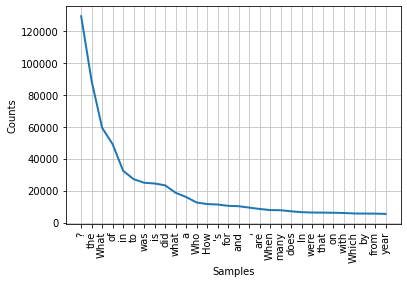

In [28]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

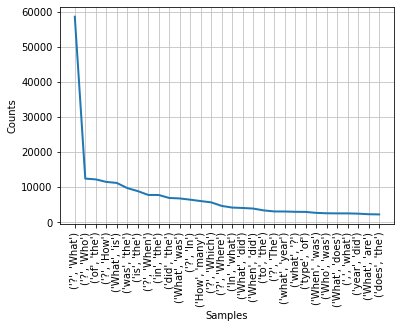

In [29]:
fdist_bigram.plot(30,cumulative=False)
plt.show()

# Possible EDAs:
 #Count Plot
 #Number of characters/words
 #Unique words
 #Word Cloud
 #Common Stopwords
 #% words in vocab not stop words
 #Analysing punctuation
 #Ngram Analysis
 #Answer type distribution
 #Avg words/question 
 #Avg words/answer
 #Avg words/context
 #Comparison within datasets used


In [30]:
stop_words=set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [45]:
#common stopwords in question
common_stopwords=[]
for w in allWords:
    if w in stop_words:
      if w not in common_stopwords:           #to avoid duplicacy
        common_stopwords.append(w)
#print("Tokenized Sentence:",tokenized_sent)
print("Common Stopwords in question:",len(common_stopwords))

Common Stopwords in question: 132


In [46]:
for w in common_stopwords:
  print(w)

did
in
when
she
was
up
and
a
what
which
the
her
to
have
as
for
of
other
how
from
their
is
are
some
them
most
herself
has
under
own
won
with
after
at
who
his
on
through
during
its
be
over
by
or
that
only
whom
am
more
than
any
out
should
now
they
this
about
had
an
where
it
before
again
were
both
do
so
does
these
will
between
until
but
not
same
doing
there
you
can
all
because
no
been
he
while
being
into
him
too
very
having
himself
down
each
few
t
against
themselves
off
if
those
here
then
above
shan
such
just
why
once
theirs
itself
our
further
don
we
yourself
below
o
nor
your
s
d
i
my
y
m
ll
haven
me
re
wouldn
doesn


In [42]:
#i=0
#length = 100
#while i < length: 
    #print(common_stopwords[i]) 
    #i += 1



did
did
in
when
she
was
up
did
and
a
what
and
did
up
which
did
what
was
she
the
her
a
the
did
to
did
have
in
was
the
as
a
did
in
did
for
her
was
in
was
the
of
her
what
other
did
did
the
for
how
did
what
did
her
did
a
in
her
and
of
her
was
in
from
her
what
did
did
their
was
the
of
was
in
is
to
is
the
of
her
what
are
some
in
them
her
of
the
most
what
of
the
her
the
most
which
did
the
of
as


In [38]:
#Avg words/ ques
num_word_ques = len(allWords)
num_ques = len(squad_df.question.value_counts())
print("num_word_ques: "+str(num_word_ques))
print(num_ques)
avg_words = num_word_ques/num_ques
print("avg_words: "+str(avg_words))

num_word_ques: 1447301
130204
avg_words: 11.115641608552732


In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
nltk.pos_tag(allWords)

[('when', 'WRB'),
 ('did', 'VBD'),
 ('beyonce', 'VB'),
 ('start', 'NN'),
 ('becoming', 'VBG'),
 ('popular', 'JJ'),
 ('what', 'WP'),
 ('areas', 'NNS'),
 ('did', 'VBD'),
 ('beyonce', 'NN'),
 ('compete', 'NN'),
 ('in', 'IN'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('growing', 'VBG'),
 ('up', 'RP'),
 ('when', 'WRB'),
 ('did', 'VBD'),
 ('beyonce', 'NN'),
 ('leave', 'VB'),
 ('destinys', 'VBN'),
 ('child', 'NN'),
 ('and', 'CC'),
 ('become', 'VB'),
 ('a', 'DT'),
 ('solo', 'JJ'),
 ('singer', 'NN'),
 ('in', 'IN'),
 ('what', 'WP'),
 ('city', 'NN'),
 ('and', 'CC'),
 ('state', 'NN'),
 ('did', 'VBD'),
 ('beyonce', 'NN'),
 ('grow', 'VB'),
 ('up', 'RP'),
 ('in', 'IN'),
 ('which', 'WDT'),
 ('decade', 'NN'),
 ('did', 'VBD'),
 ('beyonce', 'VB'),
 ('become', 'NN'),
 ('famous', 'JJ'),
 ('in', 'IN'),
 ('what', 'WP'),
 ('rb', 'NN'),
 ('group', 'NN'),
 ('was', 'VBD'),
 ('she', 'PRP'),
 ('the', 'DT'),
 ('lead', 'JJ'),
 ('singer', 'NN'),
 ('what', 'WP'),
 ('album', 'NN'),
 ('made', 'VBD'),
 ('her'

In [0]:
nltk.download('tagsets')
nltk.help.upenn_tagset('VB*')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
VBD: verb, past tense
    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...
VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...
VBN: verb, past participle
    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...
VBP: verb,

In [0]:
context_len = []
for line in squad_df['context']:
        #print(line)
        words = len(line.split())
        context_len.append(words)

In [49]:
print(len(context_len))
print(context_len[:100])

130306
[109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 184]


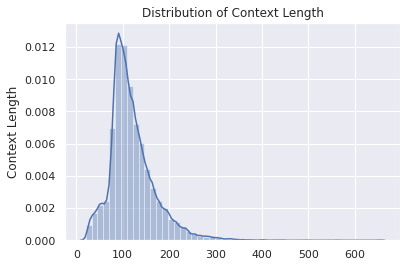

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
ax = sns.distplot(context_len)
ax.set_title('Distribution of Context Length')
ax.set_ylabel('Context Length')
plt.savefig('context_length.png')
plt.show()

In [57]:
import numpy as np
context_array = np.array(context_len)

print("Min:   ", np.min(context_array))
print("Max:   ", np.max(context_array))
print("Mean:   ", np.mean(context_array))
print("25th percentile:   ", np.percentile(context_array, 25))
print("Median:            ", np.median(context_array))
print("75th percentile:   ", np.percentile(context_array, 75))
print("95th percentile:   ", np.percentile(context_array, 95))
print("99th percentile:   ", np.percentile(context_array, 99))

Min:    20
Max:    653
Mean:    119.61623409512993
25th percentile:    89.0
Median:             110.0
75th percentile:    141.0
95th percentile:    212.0
99th percentile:    285.0


In [0]:
ques_len = []
ans_len = []
for line in squad_df['question']:
        #print(line)
        ques = len(line.split())
        ques_len.append(ques)

In [59]:
print(len(ques_len))
print(ques_len[:10])

130306
[6, 11, 11, 9, 7, 9, 8, 6, 6, 8]


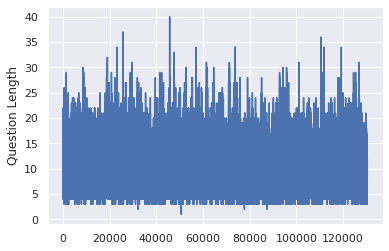

In [60]:
plt.plot(ques_len)
plt.ylabel('Question Length')
plt.show()

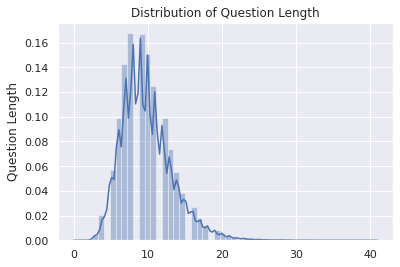

In [61]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns
sns.set(color_codes=True)
ax = sns.distplot(ques_len)
ax.set_title('Distribution of Question Length')
ax.set_ylabel('Question Length')
plt.savefig('question_length.png')
plt.show()

In [62]:
ques_array = np.array(ques_len)

print("Min:   ", np.min(ques_array))
print("Max:   ", np.max(ques_array))
print("Mean:   ", np.mean(ques_array))
print("25th percentile:   ", np.percentile(ques_array, 25))
print("Median:            ", np.median(ques_array))
print("75th percentile:   ", np.percentile(ques_array, 75))
print("95th percentile:   ", np.percentile(ques_array, 95))
print("99th percentile:   ", np.percentile(ques_array, 99))

Min:    1
Max:    40
Mean:    9.894049391432475
25th percentile:    7.0
Median:             9.0
75th percentile:    12.0
95th percentile:    16.0
99th percentile:    20.0


In [64]:
tokenized_word_answer = squad_df['answer'].apply(word_tokenize)

#pprint(tokenized_word_answer)

TypeError: ignored

In [0]:
#allWords = []
#for wordList in tokenized_word:
   # allWords += wordList

for line in squad_df['clean_answer']:
        #print(line)
        ans = len(line.split())
        ans_len.append(ans)

In [66]:
print(len(ans_len))
print(ans_len[:10])

132381
[4, 3, 1, 2, 2, 2, 3, 2, 2, 2]


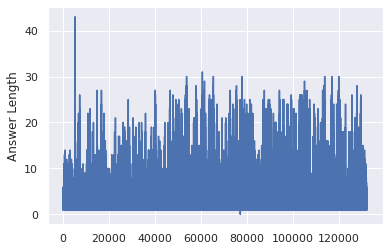

In [67]:
plt.plot(ans_len)
plt.ylabel('Answer Length')
plt.show()

In [68]:
 ans_array = np.array(ans_len)

print("Min:   ", np.min(ans_array))
print("Max:   ", np.max(ans_array))
print("Mean:   ", np.mean(ans_array))
print("25th percentile:   ", np.percentile(ans_array, 25))
print("Median:            ", np.median(ans_array))
print("75th percentile:   ", np.percentile(ans_array, 75))
print("95th percentile:   ", np.percentile(ans_array, 95))
print("99th percentile:   ", np.percentile(ans_array, 99))

Min:    0
Max:    43
Mean:    2.451159909654709
25th percentile:    1.0
Median:             1.0
75th percentile:    3.0
95th percentile:    8.0
99th percentile:    17.0


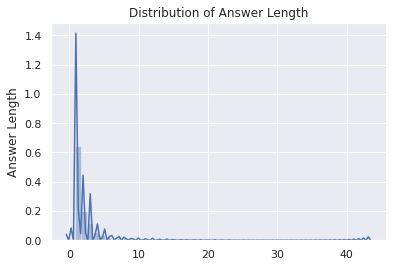

In [69]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns
sns.set(color_codes=True)
ax = sns.distplot(ans_len)
ax.set_title('Distribution of Answer Length')
ax.set_ylabel('Answer Length')
plt.savefig('answer_length.png')
plt.show()